In [ ]:
!pip install lifelines --quiet

In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from lifelines import KaplanMeierFitter, CoxPHFitter
from lifelines.statistics import logrank_test

In [7]:
df = pd.read_csv("C:\\Users\\adity\\Downloads\\veteran.csv")
print(df.head())
print(df.info())

   ID  TIME  Y       trt  celltype  karno  diagtime  age priortherapy
0   1     0  0  standard  squamous     60         7   69           no
1   1    72  1  standard  squamous     60         7   69           no
2   2     0  0  standard  squamous     70         5   64          yes
3   2   411  1  standard  squamous     70         5   64          yes
4   3     0  0  standard  squamous     60         3   38           no
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 274 entries, 0 to 273
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   ID            274 non-null    int64 
 1   TIME          274 non-null    int64 
 2   Y             274 non-null    int64 
 3   trt           274 non-null    object
 4   celltype      274 non-null    object
 5   karno         274 non-null    int64 
 6   diagtime      274 non-null    int64 
 7   age           274 non-null    int64 
 8   priortherapy  274 non-null    object
dtypes: int64(

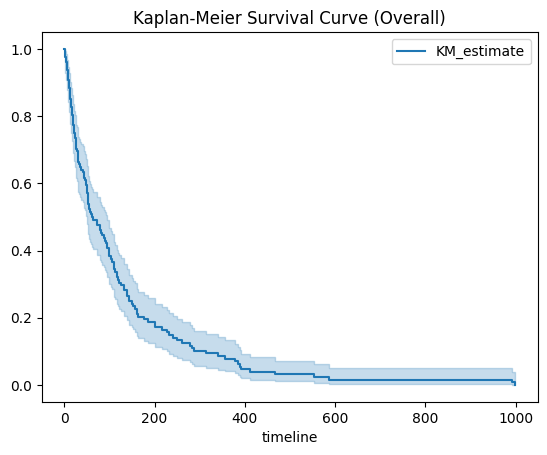

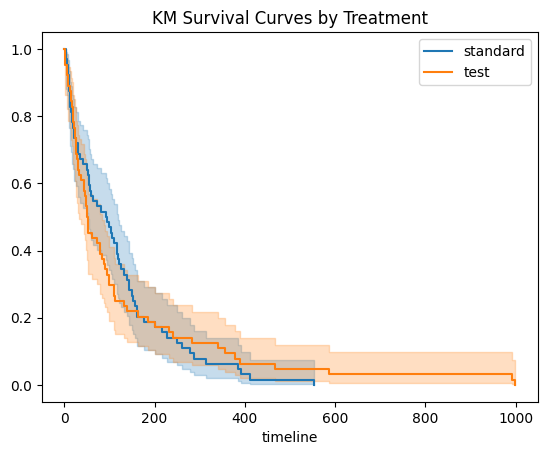

In [8]:
from lifelines import KaplanMeierFitter
import matplotlib.pyplot as plt

df_event = df[df['Y'] == 1]
kmf = KaplanMeierFitter()

kmf.fit(durations = df_event['TIME'], event_observed = df_event['Y'])
kmf.plot_survival_function()
plt.title('Kaplan-Meier Survival Curve (Overall)')
plt.show()

for trt_group in df_event['trt'].unique():
  mask = df_event['trt'] == trt_group
  kmf.fit(df_event[mask]['TIME'], df_event[mask]['Y'], label=str(trt_group))
  kmf.plot_survival_function()

plt.title('KM Survival Curves by Treatment')
plt.show()

In [9]:
for trt_group in df_event['trt'].unique():
    mask = df_event['trt'] == trt_group
    kmf.fit(df_event[mask]['TIME'], df_event[mask]['Y'], label=str(trt_group))
    print(f"Median Survival For Treatment {trt_group}: {kmf.median_survival_time_}")

Median Survival For Treatment standard: 95.0
Median Survival For Treatment test: 52.0


In [10]:
from lifelines.statistics import logrank_test

group1 = df_event[df_event['trt'] == 'standard']
group2 = df_event[df_event['trt'] == 'test']

results = logrank_test(group1['TIME'], group2['TIME'], event_observed_A = group1['Y'], event_observed_B = group2['Y'])
print(results.summary)

   test_statistic        p  -log2(p)
0          0.0116  0.91423  0.129371


<lifelines.CoxPHFitter: fitted with 128 total observations, 0 right-censored observations>
             duration col = 'TIME'
                event col = 'Y'
      baseline estimation = breslow
   number of observations = 128
number of events observed = 128
   partial log-likelihood = -465.21
         time fit was run = 2025-07-04 05:12:24 UTC

---
                    coef exp(coef)  se(coef)  coef lower 95%  coef upper 95% exp(coef) lower 95% exp(coef) upper 95%
covariate                                                                                                           
ID                  0.00      1.00      0.01           -0.03            0.03                0.97                1.03
karno              -0.03      0.97      0.01           -0.05           -0.02                0.96                0.98
diagtime           -0.00      1.00      0.01           -0.02            0.01                0.98                1.01
age                -0.01      0.99      0.01           -0.03            0.00                0.97                1.00
trt_test            0.16      1.17      1.02           -1.84            2.16                0.16                8.63
celltype_large     -0.83      0.43      0.36           -1.53           -0.14                0.22                0.87
celltype_smallcell -0.12      0.88      0.38           -0.88            0.63                0.42                1.88
celltype_squamous  -0.97      0.38      0.66           -2.27            0.33                0.10                1.38
priortherapy_yes    0.18      1.20      0.24           -0.28            0.65                0.76                1.91

                    cmp to     z      p  -log2(p)
covariate                                        
ID                    0.00  0.20   0.84      0.25
karno                 0.00 -6.08 <0.005     29.60
diagtime              0.00 -0.47   0.63      0.66
age                   0.00 -1.54   0.12      3.02
trt_test              0.00  0.16   0.88      0.19
celltype_large        0.00 -2.34   0.02      5.71
celltype_smallcell    0.00 -0.32   0.75      0.42
celltype_squamous     0.00 -1.47   0.14      2.82
priortherapy_yes      0.00  0.79   0.43      1.21
---
Concordance = 0.74
Partial AIC = 948.43
log-likelihood ratio test = 62.38 on 9 df
-log2(p) of ll-ratio test = 31.00

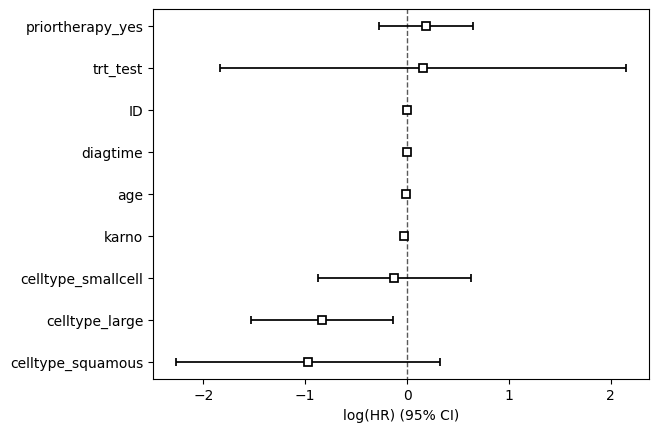

In [11]:
from lifelines import CoxPHFitter

df_wide = df_event.copy()

df_wide = pd.get_dummies(df_wide, columns = ['trt', 'celltype', 'priortherapy'], drop_first = True)

cph = CoxPHFitter()
cph.fit(df_wide, duration_col = 'TIME', event_col = 'Y')
cph.print_summary()
cph.plot()
plt.show()

In [12]:
df_start = df[df['Y'] == 0].copy()
df_event = df[df['Y'] == 1].copy()

df_event = df_event.rename(columns={"TIME": "stop", 'Y': "event"})
df_start = df_start.rename(columns={"TIME": 'start'})

df_timevarying = pd.merge(
    df_start,
    df_event[["ID", "stop", "event"]],
    on = "ID"
)

df_timevarying = pd.get_dummies(df_timevarying, columns=['trt', 'celltype', 'priortherapy'], drop_first = True)

print(df_timevarying[['ID', 'start', 'stop', 'event']].head())

   ID  start  stop  event
0   1      0    72      1
1   2      0   411      1
2   3      0   228      1
3   4      0   126      1
4   5      0   118      1


In [13]:
import numpy as np
print("Any NANs?", df_timevarying.isnull().values.any())
print("Any Infs?", np.isinf(df_timevarying.select_dtypes(include=[np.number])).values.any())

Any NANs? False
Any Infs? False


In [14]:
print(df_timevarying[df_timevarying.isnull().any(axis=1)])
print(df_timevarying[np.isinf(df_timevarying.select_dtypes(include=[np.number])).any(axis=1)])

Empty DataFrame
Columns: [ID, start, Y, karno, diagtime, age, stop, event, trt_test, celltype_large, celltype_smallcell, celltype_squamous, priortherapy_yes]
Index: []
Empty DataFrame
Columns: [ID, start, Y, karno, diagtime, age, stop, event, trt_test, celltype_large, celltype_smallcell, celltype_squamous, priortherapy_yes]
Index: []


In [15]:
if 'Y' in df_timevarying.columns:
    df_timevarying.drop(columns=['Y'], inplace=True)

<lifelines.CoxTimeVaryingFitter: fitted with 128 periods, 128 subjects, 128 events>
         event col = 'event'
number of subjects = 128
 number of periods = 128
  number of events = 128
partial log-likelihood = -465.24
  time fit was run = 2025-07-04 05:19:58 UTC

---
                    coef exp(coef)  se(coef)  coef lower 95%  coef upper 95% exp(coef) lower 95% exp(coef) upper 95%
covariate                                                                                                           
karno              -0.03      0.97      0.01           -0.05           -0.02                0.96                0.98
diagtime           -0.00      1.00      0.01           -0.02            0.01                0.98                1.01
age                -0.01      0.99      0.01           -0.03            0.00                0.97                1.00
trt_test            0.36      1.44      0.21           -0.05            0.77                0.95                2.17
celltype_large     -0.80      0.45      0.30           -1.38           -0.21                0.25                0.81
celltype_smallcell -0.18      0.84      0.28           -0.72            0.36                0.49                1.44
celltype_squamous  -1.10      0.33      0.30           -1.68           -0.51                0.19                0.60
priortherapy_yes    0.18      1.19      0.23           -0.28            0.63                0.76                1.88

                    cmp to     z      p  -log2(p)
covariate                                        
karno                 0.00 -6.07 <0.005     29.52
diagtime              0.00 -0.45   0.65      0.61
age                   0.00 -1.53   0.12      3.00
trt_test              0.00  1.72   0.08      3.56
celltype_large        0.00 -2.65   0.01      6.95
celltype_smallcell    0.00 -0.65   0.52      0.96
celltype_squamous     0.00 -3.66 <0.005     11.94
priortherapy_yes      0.00  0.76   0.45      1.17
---
Partial AIC = 946.47
log-likelihood ratio test = 62.34 on 8 df
-log2(p) of ll-ratio test = 32.53

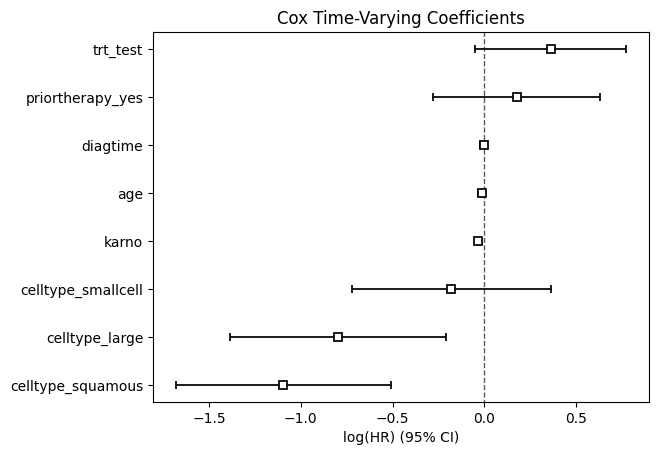

In [18]:
from lifelines import CoxTimeVaryingFitter

ctv = CoxTimeVaryingFitter()
ctv.fit(
    df_timevarying,
    id_col = 'ID',
    start_col = 'start',
    stop_col = 'stop',
    event_col = 'event'
)
ctv.print_summary()
ctv.plot()
plt.title("Cox Time-Varying Coefficients")
plt.show()

In [19]:
print(df_timevarying.columns)

Index(['ID', 'start', 'karno', 'diagtime', 'age', 'stop', 'event', 'trt_test',
       'celltype_large', 'celltype_smallcell', 'celltype_squamous',
       'priortherapy_yes'],
      dtype='object')


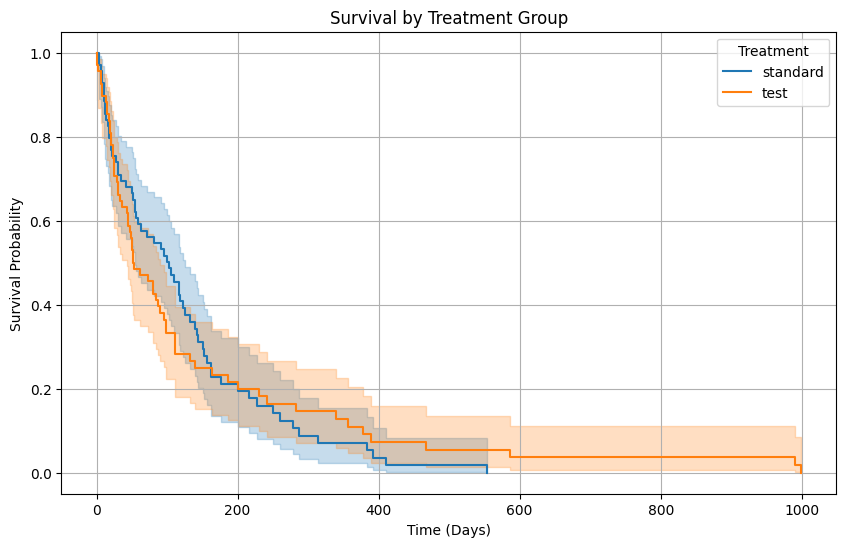

In [21]:
from lifelines import KaplanMeierFitter
import matplotlib.pyplot as plt

kmf = KaplanMeierFitter()
plt.figure(figsize=(10,6))

for group in df['trt'].unique():
    label = str(group)
    mask = df['trt'] == group
    kmf.fit(df[mask]['TIME'], event_observed=df[mask]['Y'], label=label)
    kmf.plot_survival_function()

plt.title('Survival by Treatment Group')
plt.xlabel('Time (Days)')
plt.ylabel('Survival Probability')
plt.grid(True)
plt.legend(title="Treatment")
plt.show()

In [23]:
from lifelines.statistics import logrank_test

group1 = df[df['trt'] == 'standard']
group2 = df[df['trt'] == 'test']

results = logrank_test(
    group1['TIME'], group2['TIME'],
    event_observed_A = group1['Y'],
    event_observed_B = group2['Y']
)
print(f"Log-Rank Test p-value: {results.p_value:.4f}")
if results.p_value < 0.05:
    print("-> Significant Difference In Survival.")
else:
    print("-> No Statistically Significant Difference.")

Log-Rank Test p-value: 0.9277
-> No Statistically Significant Difference.


In [28]:
import pandas as pd
from lifelines import CoxPHFitter

df_encoded = pd.get_dummies(df, columns = ['celltype', 'trt', 'priortherapy'], drop_first = True)

celltype_dummies = [col for col in df_encoded.columns if col.startswith('celltype_')]
treatment_dummies = [col for col in df_encoded.columns if col.startswith('treatment_')]
prior_dummies = [col for col in df_encoded.columns if col.startswith('prior_')]

features = ['TIME', 'Y', 'age', 'karno', 'diagtime'] + celltype_dummies + treatment_dummies + prior_dummies

cox_df = df_encoded[features]

cph = CoxPHFitter()
cph.fit(cox_df, duration_col='TIME', event_col = 'Y')
cph.print_summary()

<lifelines.CoxPHFitter: fitted with 274 total observations, 146 right-censored observations>
             duration col = 'TIME'
                event col = 'Y'
      baseline estimation = breslow
   number of observations = 274
number of events observed = 128
   partial log-likelihood = -475.48
         time fit was run = 2025-07-04 08:46:12 UTC

---
                    coef exp(coef)  se(coef)  coef lower 95%  coef upper 95% exp(coef) lower 95% exp(coef) upper 95%
covariate                                                                                                           
age                -0.01      0.99      0.01           -0.02            0.01                0.98                1.01
karno              -0.03      0.97      0.01           -0.04           -0.02                0.96                0.98
diagtime            0.00      1.00      0.01           -0.01            0.02                0.99                1.02
celltype_large     -0.86      0.42      0.30           -1.44           -0.28                0.24                0.75
celltype_smallcell -0.46      0.63      0.26           -0.98            0.05                0.38                1.05
celltype_squamous  -1.18      0.31      0.30           -1.76           -0.60                0.17                0.55

                    cmp to     z      p  -log2(p)
covariate                                        
age                   0.00 -0.63   0.53      0.92
karno                 0.00 -5.86 <0.005     27.65
diagtime              0.00  0.37   0.71      0.49
celltype_large        0.00 -2.91 <0.005      8.13
celltype_smallcell    0.00 -1.78   0.07      3.74
celltype_squamous     0.00 -4.00 <0.005     13.97
---
Concordance = 0.74
Partial AIC = 962.96
log-likelihood ratio test = 59.94 on 6 df
-log2(p) of ll-ratio test = 34.33